# Library import

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

# Load the data file

In [2]:
INPUT_MAESTRO_DATA = "MAESTRO-d6178bdd-identified_variants_merged_protein_regions-main.tsv"
variants = pd.read_csv(INPUT_MAESTRO_DATA, sep="\t", low_memory=False)

In [3]:
variants

,rowid,ccms_row_id,Algorithm,Filename,Cluster_index,Peptide,Unmodified_sequence,Charge,_dyn_#Intensity_for_cluster,_dyn_#Intensity_for_unmodified_sequence,...,PSP_site_match,DrugBank_drugs,Parent_mass,Num_PSP_Drugbank_events,Start_AA_1_based,End_AA_1_based,Num_spectra_for_cluster,Num_spectra_for_unmodified_sequence,Num_spectra_for_peptide_variant,Internal_ref_orig_intensity
0,1,1,.MODA.,specs_ms.mgf,960991,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V",.GARLIPEMDQIFTEVEMTTLEK.,4,36.905893,36.905893,...,NaN,NaN,1580.81,0,NaN,NaN,1,1,1,8.204159e+03
1,2,2,.MODA.,specs_ms.mgf,763982,"I.[304.207]FTEVEMTTLE(K,304.207).V",.FTEVEMTTLEK.,3,11.686782,11.686782,...,NaN,NaN,1934.91,0,NaN,NaN,1,2,2,4.936894e+05
2,3,3,.MSGFPLUS.,specs_ms.mgf,902201,K.[304.207]LYQPEYQEVSTEEQR.E,.LYQPEYQEVSTEEQR.,3,15.690234,15.690234,...,NaN,NaN,2203.09,0,NaN,NaN,5,6,6,1.951566e+05
3,4,4,.MSGFPLUS.,specs_ms.mgf,935503,"K.[304.207]AANSLEAFIFETQD(K,304.207).L",.AANSLEAFIFETQDK.,3,15.016824,15.016824,...,NaN,NaN,2292.24,0,NaN,NaN,3,4,4,2.877781e+06
4,5,5,.MODA.,specs_ms.mgf,297961,"R.[304.207]YSHDF(N,-56.985)FH.I",.YSHDFNFH.,3,33.768015,33.768015,...,NaN,NaN,1313.66,0,NaN,NaN,3,3,3,7.088440e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101456,101457,101457,.MODA.,specs_ms.mgf,480358,"K.[304.207]YLGE(E,-68.078)YV(K,304.207).A",.YLGEEYVK.,3,15.671927,14.867811,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,1027.56,1,NaN,NaN,2,1072,2,2.338236e+04
101457,101458,101458,.MODA.,specs_ms.mgf,237950,"K.[304.207]YL(G,55.921)EEYV(K,304.207).A",.YLGEEYVK.,4,13.932377,14.867811,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,1664.83,1,NaN,NaN,2,1072,2,5.700355e+04
101458,101459,101459,.MODA.,specs_ms.mgf,1037953,"K.{187.018}[304.207]YLGEEYV(K,304.207).A",.YLGEEYVK.,2,14.412538,14.867811,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,1795.93,1,NaN,NaN,3,1072,3,3.027917e+05
101459,101460,101460,.MODA.,specs_ms.mgf,1022758,"R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A",.NTYEKYLGEEYVK.,3,13.872686,22.237222,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,2605.44,1,NaN,NaN,5,17,8,9.954486e+04


In [190]:
print("The number of column =", len(variants.columns))
for c in variants.columns:
    print(c)

The number of column = 268
rowid
ccms_row_id
Algorithm
Filename
Cluster_index
Peptide
Unmodified_sequence
Charge
_dyn_#Intensity_for_cluster
_dyn_#Intensity_for_unmodified_sequence
Num_G1_spectra_for_unmodified_sequence
Num_G2_spectra_for_unmodified_sequence
Num_G3_spectra_for_unmodified_sequence
Num_G4_spectra_for_unmodified_sequence
Num_G5_spectra_for_unmodified_sequence
Num_G6_spectra_for_unmodified_sequence
_dyn_#Empty.Empty.Empty..Empty.1_intensity_for_unmodified_sequence
_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for_unmodified_sequence
_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_for_unmodified_sequence
_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_for_unmodified_sequence
_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_for_unmodified_sequence
_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_for_unmodified_sequence
_dyn_#Healthy.HC19.Healthy..HC19.1_intensity_for_unmodified_sequence
_dyn_#Healthy.HC2.Healthy..HC2.1_intensity_for_unmodified_sequence
_dyn_#Healthy.HC20.Healthy..HC20.1_inte

# Preprocessing

### Missing value handling

In [191]:
# we only need the intensities for each peptide, noted as "...intensity_for_peptide_variant"
variants_processed = variants[
    ['Peptide'] + [c for c in variants.columns if 'intensity_for_peptide_variant' in c]
]

# replace zero values (which are all intensities) in the processed matrix with N/As
variants_processed.replace(0.0, np.nan, inplace=True)
variants_processed.head()

C:\Users\86157\AppData\Local\Temp\ipykernel_16692\762386531.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variants_processed.replace(0.0, np.nan, inplace=True)


,Peptide,_dyn_#Empty.Empty.Empty..Empty.1_intensity_for_peptide_variant,_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for_peptide_variant,_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_for_peptide_variant,_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_for_peptide_variant,_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_for_peptide_variant,_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_for_peptide_variant,_dyn_#Healthy.HC19.Healthy..HC19.1_intensity_for_peptide_variant,_dyn_#Healthy.HC2.Healthy..HC2.1_intensity_for_peptide_variant,_dyn_#Healthy.HC20.Healthy..HC20.1_intensity_for_peptide_variant,...,_dyn_#Symptomatic-non-COVID-19.JBDZ24.Symptomatic-non-COVID-19..JBDZ24.1_intensity_for_peptide_variant,_dyn_#Symptomatic-non-COVID-19.JBDZ25.Symptomatic-non-COVID-19..JBDZ25.1_intensity_for_peptide_variant,_dyn_#Symptomatic-non-COVID-19.JBDZ3.Symptomatic-non-COVID-19..JBDZ3.1_intensity_for_peptide_variant,_dyn_#Symptomatic-non-COVID-19.JBDZ4.Symptomatic-non-COVID-19..JBDZ4.1_intensity_for_peptide_variant,_dyn_#Symptomatic-non-COVID-19.JBDZ5.Symptomatic-non-COVID-19..JBDZ5.1_intensity_for_peptide_variant,_dyn_#Symptomatic-non-COVID-19.JBDZ6.Symptomatic-non-COVID-19..JBDZ6.1_intensity_for_peptide_variant,_dyn_#Symptomatic-non-COVID-19.JBDZ7.Symptomatic-non-COVID-19..JBDZ7.1_intensity_for_peptide_variant,_dyn_#Symptomatic-non-COVID-19.JBDZ8.Symptomatic-non-COVID-19..JBDZ8.1_intensity_for_peptide_variant,_dyn_#Symptomatic-non-COVID-19.JBDZ9.Symptomatic-non-COVID-19..JBDZ9.1_intensity_for_peptide_variant,_dyn_#Symptomatic-non-COVID-19.Patient-group-jbdz.Symptomatic-non-COVID-19..Patient-group-jbdz.1_intensity_for_peptide_variant
0,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V",2.459416,NaN,6.645649,3.391896,1.919552,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"I.[304.207]FTEVEMTTLE(K,304.207).V",0.961707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.435434,0.736280,0.79655,1.144616
2,K.[304.207]LYQPEYQEVSTEEQR.E,0.326271,0.935916,NaN,NaN,NaN,0.286530,0.177772,0.987496,0.220930,...,NaN,NaN,1.232362,NaN,NaN,NaN,0.200232,0.170478,0.19740,0.047076
3,"K.[304.207]AANSLEAFIFETQD(K,304.207).L",0.878024,NaN,NaN,NaN,NaN,1.259306,0.629756,NaN,0.781082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"R.[304.207]YSHDF(N,-56.985)FH.I",0.170619,NaN,NaN,NaN,NaN,NaN,0.238642,NaN,0.272645,...,0.796323,0.832859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Group samples by Peptide

In [192]:
#set the index to be each Peptide
variants_processed = variants_processed.set_index('Peptide')

#transpose the matrix, so each column is a peptide
variants_processed = variants_processed.T
variants_processed.head()

Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G","K.[304.207]H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-21.617)V(K,304.207).A","K.[304.207]YLGEE(Y,-57.005)V(K,304.207).A","K.[304.207]YLGEE(Y,-58.064)V(K,304.207).A","K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A"
_dyn_#Empty.Empty.Empty..Empty.1_intensity_for_peptide_variant,2.459416,0.961707,0.326271,0.878024,0.170619,0.570221,0.574879,0.914939,0.649916,0.017884,...,0.521673,0.240862,0.787867,1.144694,0.929711,1.007395,0.353838,0.302468,0.735814,1.0683
_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for_peptide_variant,NaN,NaN,0.935916,NaN,NaN,NaN,NaN,NaN,NaN,0.288821,...,NaN,1.958825,NaN,NaN,1.174198,NaN,NaN,NaN,0.370040,NaN
_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_for_peptide_variant,6.645649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026024,...,NaN,2.544654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_for_peptide_variant,3.391896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009033,...,NaN,0.913199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_for_peptide_variant,1.919552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028415,...,NaN,1.035449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
#only retain first two elements in the headers
variants_processed.index = variants_processed.index.map(lambda x: '.'.join(x.split('.')[:2]))

#set the condition to the first element
variants_processed['Condition'] = variants_processed.index.map(lambda x: x.split('.')[0])

### Special character handling

Reason: In XGBoost model, feature names must be string, and may not contain [,] or <

In [194]:
variants_processed.columns= variants_processed.columns.str.replace("[",'#')
variants_processed.columns= variants_processed.columns.str.replace("]",'#')
variants_processed.columns= variants_processed.columns.str.replace("<",'#')

C:\Users\86157\AppData\Local\Temp\ipykernel_16692\4148762274.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  variants_processed.columns= variants_processed.columns.str.replace("[",'#')
C:\Users\86157\AppData\Local\Temp\ipykernel_16692\4148762274.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  variants_processed.columns= variants_processed.columns.str.replace("]",'#')


### Classification group construction
There are four types of patients in the dataset: healthy, symptomatic-non-COVID-19, non-severe-COVID-19, severe-COVID-19. We define non-severe-COVID-19 and severe-COVID-19 samples to have COVID-19 and healthy and symptomatic-non-COVID-19 samples do not have COVID-19. 

In [195]:
# separate the new group as Non covid and covid
variants_processed_covid = variants_processed[(variants_processed.Condition.str.contains("Severe-COVID-19")) 
                             | (variants_processed.Condition.str.contains("Non-severe-COVID-19") )]
variants_processed_covid["our-group"] = "COVID"
variants_processed_covid["label"] = 1

variants_processed_non_covid = variants_processed[(variants_processed.Condition.str.contains("Healthy")) 
                             | (variants_processed.Condition.str.contains("Symptomatic") )]
variants_processed_non_covid["our-group"] = "NON-COVID"
variants_processed_non_covid["label"] = 0

print("Positive training sample size:", variants_processed_covid.shape[0], "\n Negative training sample size:", variants_processed_non_covid.shape[0])

Positive training sample size: 43 
 Negative training sample size: 47


C:\Users\86157\AppData\Local\Temp\ipykernel_16692\3109800893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variants_processed_covid["our-group"] = "COVID"
C:\Users\86157\AppData\Local\Temp\ipykernel_16692\3109800893.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variants_processed_covid["label"] = 1
C:\Users\86157\AppData\Local\Temp\ipykernel_16692\3109800893.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [196]:
print("Positive samples:")
variants_processed_covid.head(5)

Positive samples:


Peptide,"K.#304.207#GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.#304.207#FTEVEMTTLE(K,304.207).V",K.#304.207#LYQPEYQEVSTEEQR.E,"K.#304.207#AANSLEAFIFETQD(K,304.207).L","R.#304.207#YSHDF(N,-56.985)FH.I","R.#304.207#(P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.#304.207#QGSTGEEFHFQTGGR.D,"K.#304.207#HGTDDGVVW(M,15.995)NW(K,304.207).G","K.#304.207#(H,100.027)GTDDGVVWMNW(K,304.207).G","K.#304.207#H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.#304.207#YLGEE(Y,-60.599)V(K,304.207).A","K.#304.207#YLGEE(Y,-63.608)V(K,304.207).A","K.#304.207#YLGE(E,-68.078)YV(K,304.207).A","K.#304.207#YL(G,55.921)EEYV(K,304.207).A","K.{187.018}#304.207#YLGEEYV(K,304.207).A","R.#304.207#NTYE(K,361.237)YLGEEYV(K,304.207).A","K.#304.207#YLGE(E,125.898)YV(K,304.207).A",Condition,our-group,label
_dyn_#Non-severe-COVID-19.Patient-group-PT,NaN,NaN,0.678696,2.127578,NaN,NaN,NaN,NaN,NaN,0.334896,...,2.343374,0.833948,NaN,NaN,NaN,0.964770,NaN,_dyn_#Non-severe-COVID-19,COVID,1
_dyn_#Non-severe-COVID-19.XG1,NaN,NaN,0.743318,NaN,NaN,NaN,NaN,NaN,NaN,0.278907,...,NaN,0.589243,NaN,NaN,NaN,0.163054,NaN,_dyn_#Non-severe-COVID-19,COVID,1
_dyn_#Non-severe-COVID-19.XG10,2.696391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_dyn_#Non-severe-COVID-19,COVID,1
_dyn_#Non-severe-COVID-19.XG11,2.208365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_dyn_#Non-severe-COVID-19,COVID,1
_dyn_#Non-severe-COVID-19.XG13,3.721901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019735,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_dyn_#Non-severe-COVID-19,COVID,1


In [197]:
print("Negative samples:")
variants_processed_non_covid.head(5)

Negative samples:


Peptide,"K.#304.207#GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.#304.207#FTEVEMTTLE(K,304.207).V",K.#304.207#LYQPEYQEVSTEEQR.E,"K.#304.207#AANSLEAFIFETQD(K,304.207).L","R.#304.207#YSHDF(N,-56.985)FH.I","R.#304.207#(P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.#304.207#QGSTGEEFHFQTGGR.D,"K.#304.207#HGTDDGVVW(M,15.995)NW(K,304.207).G","K.#304.207#(H,100.027)GTDDGVVWMNW(K,304.207).G","K.#304.207#H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.#304.207#YLGEE(Y,-60.599)V(K,304.207).A","K.#304.207#YLGEE(Y,-63.608)V(K,304.207).A","K.#304.207#YLGE(E,-68.078)YV(K,304.207).A","K.#304.207#YL(G,55.921)EEYV(K,304.207).A","K.{187.018}#304.207#YLGEEYV(K,304.207).A","R.#304.207#NTYE(K,361.237)YLGEEYV(K,304.207).A","K.#304.207#YLGE(E,125.898)YV(K,304.207).A",Condition,our-group,label
_dyn_#Healthy.HC1,NaN,NaN,0.935916,NaN,NaN,NaN,NaN,NaN,NaN,0.288821,...,NaN,1.174198,NaN,NaN,NaN,0.370040,NaN,_dyn_#Healthy,NON-COVID,0
_dyn_#Healthy.HC10,6.645649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_dyn_#Healthy,NON-COVID,0
_dyn_#Healthy.HC12,3.391896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_dyn_#Healthy,NON-COVID,0
_dyn_#Healthy.HC13,1.919552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_dyn_#Healthy,NON-COVID,0
_dyn_#Healthy.HC17,NaN,NaN,0.286530,1.259306,NaN,NaN,NaN,NaN,NaN,NaN,...,0.863862,NaN,NaN,NaN,NaN,0.791905,NaN,_dyn_#Healthy,NON-COVID,0


In [198]:
dataset_preprocessed = pd.concat([variants_processed_covid, variants_processed_non_covid], axis=0)
print("Constructed dataset:", dataset_preprocessed.shape)

Constructed dataset: (90, 101464)


# Preliminary Analysis

### Draw histograms/plots

Todo: @Steven
Change x= "Some other features" 

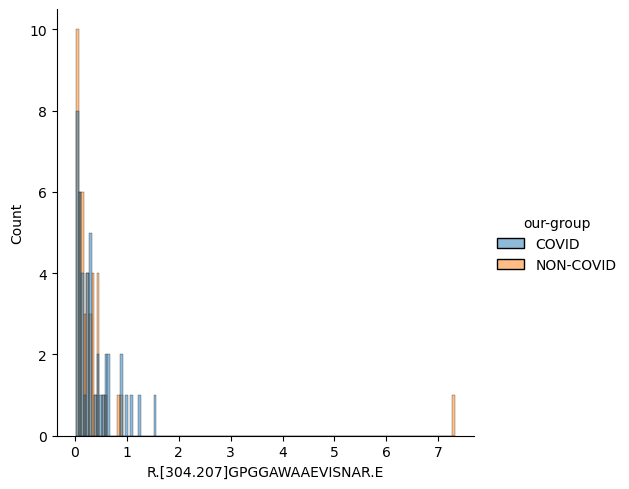

In [170]:
his_data = sns.displot(dataset_preprocessed, x='R.[304.207]GPGGAWAAEVISNAR.E', hue='our-group', binwidth=0.05)

In [171]:
# his_data.data

### 2D plot

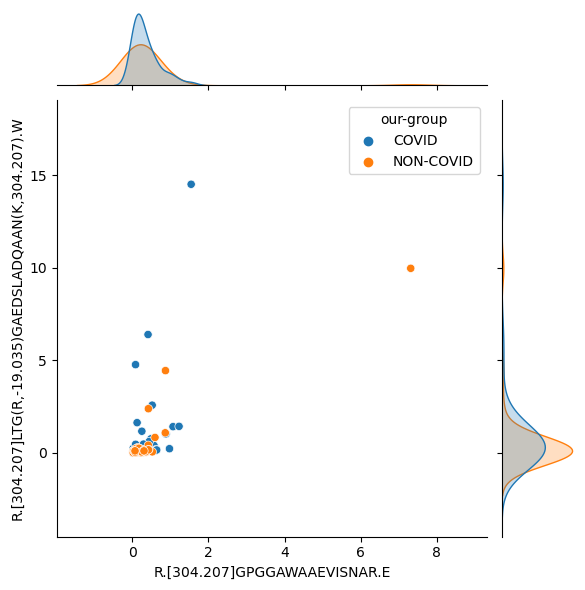

In [172]:
#use the same filtered matrix from above

sns.jointplot(x=dataset_preprocessed["R.[304.207]GPGGAWAAEVISNAR.E"],
              y=dataset_preprocessed["R.[304.207]LTG(R,-19.035)GAEDSLADQAAN(K,304.207).W"],
              hue=dataset_preprocessed['our-group'])

### Data preprocessing for heat maps

In [173]:
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        df_std[column] = df_std[column].map(lambda x: x if np.isnan(x) else min(3,max(-3,x)))
    return df_std

In [174]:
#make a copy of the matrix for further processing in the heatmap
dataset_preprocessed_heatmap = dataset_preprocessed.copy()
# the top 12 variants for SAA2 in COVID19
top_variants = ["R.[304.207]GPGGAWAAEVISNAR.E", "R.[304.207]LTG(R,-19.035)GAEDSLADQAAN(K,304.207).W", "A.[304.207](W,-121.748)AAEVISNAR.E", "R.[304.207](L,172.089)TGRGAEDSLADQAAN(K,304.207).W", "R.[304.207](L,285.173)TGRGAEDSLADQAAN(K,304.207).W", "R.[304.207]LTG(R,-19.032)GAEDSLADQAAN(K,304.207)WG.R", "K.[304.207]RGPGGA(W,16.001)AAEVISNAR.E", "D.[226.063]SLADQAAN(K,304.207).W", "R.{59.319}[304.207]GAEDSLADQAAN(K,304.207).W", "L.[304.207]TG(R,-19.036)GAEDSLADQAAN(K,304.207).W", "R.{60.067}[304.207]GAEDSLADQAAN(K,304.207).W", "R.[304.207]LTG(R,37.986)GAEDSLADQAAN(K,304.207).W"]
dataset_preprocessed_heatmap = dataset_preprocessed_heatmap.loc[:,list(top_variants)]
# z-score transform the peptide intensities
dataset_preprocessed_heatmap = z_score(dataset_preprocessed_heatmap)
#transpose the matrix, so we can have peptides as rows
dataset_preprocessed_heatmap = dataset_preprocessed_heatmap.T
dataset_preprocessed_heatmap

,Non-severe-COVID-19.Patient-group-PT.Non-severe-COVID-19..Patient-group-PT.1_intensity_for_peptide_variant,Non-severe-COVID-19.XG1.Non-severe-COVID-19..XG1.1_intensity_for_peptide_variant,Non-severe-COVID-19.XG10.Non-severe-COVID-19..XG10.1_intensity_for_peptide_variant,Non-severe-COVID-19.XG11.Non-severe-COVID-19..XG11.1_intensity_for_peptide_variant,Non-severe-COVID-19.XG13.Non-severe-COVID-19..XG13.1_intensity_for_peptide_variant,Non-severe-COVID-19.XG14.Non-severe-COVID-19..XG14.1_intensity_for_peptide_variant,Non-severe-COVID-19.XG15.Non-severe-COVID-19..XG15.1_intensity_for_peptide_variant,Non-severe-COVID-19.XG16.Non-severe-COVID-19..XG16.1_intensity_for_peptide_variant,Non-severe-COVID-19.XG17.Non-severe-COVID-19..XG17.1_intensity_for_peptide_variant,Non-severe-COVID-19.XG18.Non-severe-COVID-19..XG18.1_intensity_for_peptide_variant,...,Symptomatic-non-COVID-19.JBDZ24.Symptomatic-non-COVID-19..JBDZ24.1_intensity_for_peptide_variant,Symptomatic-non-COVID-19.JBDZ25.Symptomatic-non-COVID-19..JBDZ25.1_intensity_for_peptide_variant,Symptomatic-non-COVID-19.JBDZ3.Symptomatic-non-COVID-19..JBDZ3.1_intensity_for_peptide_variant,Symptomatic-non-COVID-19.JBDZ4.Symptomatic-non-COVID-19..JBDZ4.1_intensity_for_peptide_variant,Symptomatic-non-COVID-19.JBDZ5.Symptomatic-non-COVID-19..JBDZ5.1_intensity_for_peptide_variant,Symptomatic-non-COVID-19.JBDZ6.Symptomatic-non-COVID-19..JBDZ6.1_intensity_for_peptide_variant,Symptomatic-non-COVID-19.JBDZ7.Symptomatic-non-COVID-19..JBDZ7.1_intensity_for_peptide_variant,Symptomatic-non-COVID-19.JBDZ8.Symptomatic-non-COVID-19..JBDZ8.1_intensity_for_peptide_variant,Symptomatic-non-COVID-19.JBDZ9.Symptomatic-non-COVID-19..JBDZ9.1_intensity_for_peptide_variant,Symptomatic-non-COVID-19.Patient-group-jbdz.Symptomatic-non-COVID-19..Patient-group-jbdz.1_intensity_for_peptide_variant
Peptide,,,,,,,,,,,,,,,,,,,,,
R.[304.207]GPGGAWAAEVISNAR.E,-0.112401,-0.164942,-0.391158,-0.437530,-0.426370,-0.279045,-0.286316,-0.174225,-0.328594,-0.238737,...,-0.009161,-0.020687,0.616018,-0.431223,-0.381947,-0.380278,-0.083003,0.064130,-0.082694,-0.377704
"R.[304.207]LTG(R,-19.035)GAEDSLADQAAN(K,304.207).W",-0.333027,-0.343899,-0.259501,-0.239384,-0.304089,-0.316274,-0.271065,-0.159562,-0.346421,-0.315402,...,-0.334097,-0.325396,0.164332,NaN,-0.311581,-0.337160,-0.287189,-0.277831,-0.305363,-0.303944
"A.[304.207](W,-121.748)AAEVISNAR.E",0.122022,NaN,-0.499085,-0.619964,-0.602590,-0.421388,-0.413957,-0.258472,-0.546678,-0.563723,...,-0.308120,-0.307245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.418971
"R.[304.207](L,172.089)TGRGAEDSLADQAAN(K,304.207).W",-0.631992,-0.662901,NaN,NaN,NaN,-0.550407,-0.536465,-0.471712,-0.460549,-0.557464,...,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"R.[304.207](L,285.173)TGRGAEDSLADQAAN(K,304.207).W",-0.295882,-0.300998,-0.252076,-0.308775,-0.303244,-0.296331,-0.247685,-0.128815,-0.311994,-0.307223,...,-0.270069,-0.275343,-0.042284,NaN,-0.306139,-0.309972,-0.205093,-0.169992,-0.227980,-0.222015
"R.[304.207]LTG(R,-19.032)GAEDSLADQAAN(K,304.207)WG.R",0.041968,NaN,NaN,NaN,NaN,-0.303922,-0.315877,-0.157950,-0.460806,-0.449611,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.340329,-0.247640,-0.284370,-0.372542
"K.[304.207]RGPGGA(W,16.001)AAEVISNAR.E",-0.567477,-0.716445,-0.462775,-0.570834,-0.430609,NaN,NaN,NaN,NaN,NaN,...,0.287371,0.382854,0.551323,NaN,NaN,NaN,-0.435294,-0.374774,-0.489603,0.161877
"D.[226.063]SLADQAAN(K,304.207).W",-0.062826,NaN,-0.518131,-0.723469,-0.522999,-0.285933,-0.393611,-0.168953,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.389180,0.399944,0.214528,0.197281
"R.{59.319}[304.207]GAEDSLADQAAN(K,304.207).W",-0.326509,-0.336994,-0.070051,-0.290422,-0.259056,NaN,NaN,NaN,-0.292955,-0.281407,...,-0.239749,-0.228922,-0.013143,NaN,NaN,NaN,-0.315000,-0.292622,-0.309016,-0.316587


### Draw the heat map for the top 12 variants

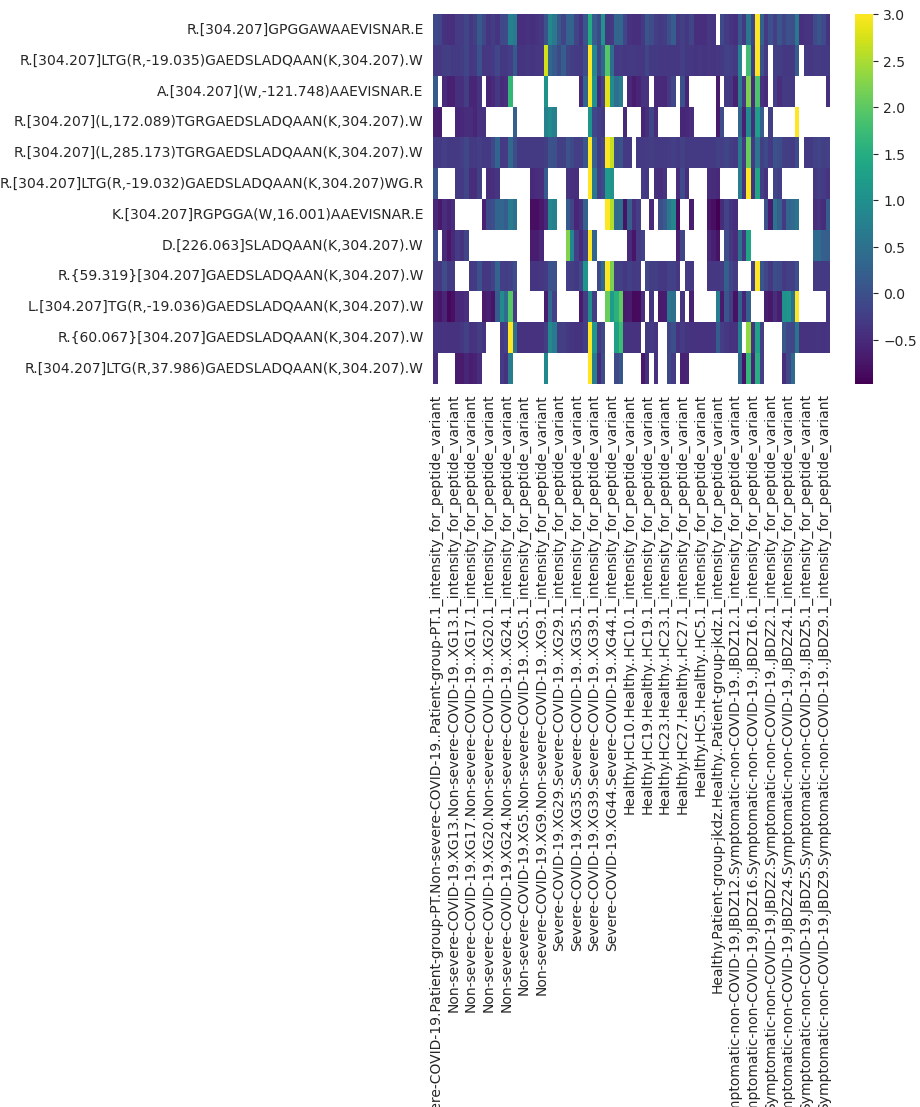

In [175]:
cmap = sns.color_palette("viridis", as_cmap=True)
with sns.axes_style("white"):
    sns.heatmap(dataset_preprocessed_heatmap, cmap=cmap)

# Statistical tests
In the code below we use two functions in scipy.stats to compute the t-test (standard/typical test for difference of means, makes Gaussian assumptions) and the Mann-Whitney rank test (non-parametric version of the test for difference of medians, does not make Gaussian assumptions) between two groups of intensities from a variant. These tests are to answer whether the means (t-test) or medians (Mann-Whitney) of the two groups are significantly different. 

Result:
Do not pass the t-test and Mann-Whitney test (value all >0.05), which means the problem we are researching is hard to classify by simple statistics. --> the problem is meaningful since it's hard for traditional methods. We intended to use machine learning methods which combine many features of data to do a comprehensive classification, so that it will still achieve a good performance.


In [177]:
covid_intensities = dataset_preprocessed["R.[304.207]GPGGAWAAEVISNAR.E"][dataset_preprocessed.label == 1].dropna()
non_covid_intensities = dataset_preprocessed["R.[304.207]GPGGAWAAEVISNAR.E"][dataset_preprocessed.label == 0].dropna()
print("T-test:", stats.ttest_ind(covid_intensities, non_covid_intensities, equal_var = False))
print("Mann-Whitney rank test:", stats.mannwhitneyu(covid_intensities, non_covid_intensities, alternative = 'two-sided'))

T-test: Ttest_indResult(statistic=-0.18048971726399027, pvalue=0.8574213044912364)
Mann-Whitney rank test: MannwhitneyuResult(statistic=1126.0, pvalue=0.26241612707812756)


# Model
Among these models, we select Extreme Gradient Boosting (XGBoost) and Random Forest as our benchmark models, and choose Logistic Regression as our baseline model. 


In [178]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from mpl_toolkits import mplot3d
from sklearn import linear_model
from sklearn import ensemble
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

### Dataset construction
1. randomize the dataset
2. train, val, test split

In [199]:
# randomize the dataset
dataset_preprocessed_random = dataset_preprocessed.sample(frac=1, random_state=1)
X_raw = dataset_preprocessed_random.drop(["label", "our-group", "Condition"], axis=1)
Y_raw = dataset_preprocessed_random["label"]

In [200]:
# train, val, test split
TRAIN_SIZE = 0.8
VAL_SIZE = 0.1
TEST_SIZE = 0.1

N = len(X_raw)
X_train = X_raw[:int(N*TRAIN_SIZE)]
Y_train = Y_raw[:int(N*TRAIN_SIZE)]
X_val = X_raw[int(N*TRAIN_SIZE): int(N*(TRAIN_SIZE+VAL_SIZE))]
Y_val = Y_raw[int(N*TRAIN_SIZE): int(N*(TRAIN_SIZE+VAL_SIZE))]
X_test = X_raw[int(N*(TRAIN_SIZE+VAL_SIZE)):]
Y_test = Y_raw[int(N*(TRAIN_SIZE+VAL_SIZE)):]

print("train,val,test dataset size:", X_train.shape, X_val.shape, X_test.shape)

train,val,test dataset size: (72, 101461) (9, 101461) (9, 101461)


### Missing Value handling
Reason:
LogisticRegression does not accept missing values encoded as NaN natively.

Try two methods:
1. fill the missing value with 0
2. fill the missing value with mean value --> Note: we need to calculate mean separately, so that the information in the training set won't leak into the validation and testing processes.Here we use a tool to complete missing values with simple strategies. https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [201]:
X_train.isna().sum(axis = 0)

Peptide
K.#304.207#GARLIPEMDQIFTEVEMTTLE(K,304.207).V     61
I.#304.207#FTEVEMTTLE(K,304.207).V                59
K.#304.207#LYQPEYQEVSTEEQR.E                      29
K.#304.207#AANSLEAFIFETQD(K,304.207).L            57
R.#304.207#YSHDF(N,-56.985)FH.I                   57
                                                  ..
K.#304.207#YLGE(E,-68.078)YV(K,304.207).A         51
K.#304.207#YL(G,55.921)EEYV(K,304.207).A          51
K.{187.018}#304.207#YLGEEYV(K,304.207).A          53
R.#304.207#NTYE(K,361.237)YLGEEYV(K,304.207).A    50
K.#304.207#YLGE(E,125.898)YV(K,304.207).A         54
Length: 101461, dtype: int64

In [202]:
from sklearn.impute import SimpleImputer

fillna_method = 1

if fillna_method == 1:
    # Method 1
    X_train = X_train.fillna(0)
    X_val = X_val.fillna(0)
    X_test = X_test.fillna(0)
else:
    # Method 2
    my_imputer = SimpleImputer(strategy = 'mean')

    X_train = my_imputer.fit_transform(X_train)
    X_val = my_imputer.transform(X_val)
    X_test = my_imputer.transform(X_test)
    
print("Training data:", X_train.shape)
print("Val data:", X_val.shape)
print("Test data:", X_test.shape)

Training data: (72, 101461)
Val data: (9, 101461)
Test data: (9, 101461)


### Metrics
- False Positive, False Negative, True Positive, True Negative
- Precision
- Recall
- Accuracy or Balanced accuracy
- F1 Score
- ROC curve and Area under the ROC curve (AUC)


In [203]:
def getMetrics(predictions, y):
    TP = sum([(p and l) for (p, l) in zip(predictions, y)])
    FP = sum([(p and not l) for (p, l) in zip(predictions, y)])
    TN = sum([(not p and not l) for (p, l) in zip(predictions, y)])
    FN = sum([(not p and l) for (p, l) in zip(predictions, y)])
    return TP, TN, FP, FN

### Logistic regression

What --> Steven

HP tuning: tune HP C


In [204]:
Y_val

_dyn_#Non-severe-COVID-19.XG2             1
_dyn_#Non-severe-COVID-19.XG3             1
_dyn_#Non-severe-COVID-19.XG5             1
_dyn_#Healthy.HC20                        0
_dyn_#Severe-COVID-19.Patient-group-ZX    1
_dyn_#Non-severe-COVID-19.XG15            1
_dyn_#Symptomatic-non-COVID-19.JBDZ15     0
_dyn_#Symptomatic-non-COVID-19.JBDZ2      0
_dyn_#Non-severe-COVID-19.XG1             1
Name: label, dtype: int64

In [205]:
acc_list = []
C_list = [10 ** i for i in range(-4, 2, 1)]
for C in C_list:
    model = linear_model.LogisticRegression(C=C, class_weight='balanced')
    model.fit(X_train, Y_train)
    preds = model.predict(X_val)
    TP, TN, FP, FN = getMetrics(preds, Y_val)
    acc4 = (TP + TN) / (TP + TN + FP + FN)
    acc_list.append(acc4)

idx = acc_list.index(max(acc_list))
bestC = C_list[idx]
acc4 = acc_list[idx]
print("Logistic Regression Classifier best acc:", acc4, "bestC:", bestC)

# classifier based method
model = linear_model.LogisticRegression(C=bestC, class_weight='balanced')
model.fit(X_train, Y_train)

preds = model.predict(X_test)
TP, TN, FP, FN = getMetrics(preds, Y_test)
acc_test = (TP + TN) / (TP + TN + FP + FN)
print("Logistic Regression Classifier test accuracy:", acc_test)

Logistic Regression Classifier best acc: 0.8888888888888888 bestC: 0.0001
Logistic Regression Classifier test accuracy: 1.0


### Random Forest

In [214]:
# Random Forest
rf_random_seed = 1

acc_list = []
Depth_list = [i*50 for i in range(3,7)]
for depth in Depth_list:
    random_forest_model = ensemble.RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=depth, random_state=rf_random_seed)
    random_forest_model.fit(X_train, Y_train)
    preds = model.predict(X_val)
    TP, TN, FP, FN = getMetrics(preds, Y_val)
    acc_val = (TP + TN) / (TP + TN + FP + FN)
    acc_list.append(acc_val)
    
idx = acc_list.index(max(acc_list))
bestD = Depth_list[idx]
acc_val = acc_list[idx]
print("Random Forest Classifier best acc:", acc_val, "bestC:", bestD)

random_forest_model = ensemble.RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=bestD, random_state=rf_random_seed)
random_forest_model.fit(X_train, Y_train)
pred_rf = random_forest_model.predict(X_test)
TP, TN, FP, FN = getMetrics(pred_rf, Y_test)
acc_test = (TP + TN) / (TP + TN + FP + FN)

print("Random Forest Model test accuracy:", acc_test)

Random Forest Classifier best acc: 0.8888888888888888 bestC: 150
Random Forest Model test accuracy: 0.8888888888888888


# XGBoost

In [243]:
# XGBoost model
xgb_random_seed = 1

xgb_model_raw = xgb.XGBClassifier(seed=xgb_random_seed)
xgb_model_raw.fit(X_train, Y_train)
pred_xgb = xgb_model_raw.predict(X_test)
TP, TN, FP, FN = getMetrics(pred_rf, Y_test)
acc_test = (TP + TN) / (TP + TN + FP + FN)

print("XGBoost Model test results:", acc_test)

XGBoost Model test results: 0.8888888888888888


### Fine-tuning of XGBoost Model

training logs:
[I 12:48:40.811 NotebookApp] Saving file at /CSE291_Notebook_Brian.ipynb
[CV] END colsample_bylevel=0.6, colsample_bytree=0.4, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.5; total time= 1.3min
[CV] END colsample_bylevel=0.6, colsample_bytree=0.4, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.5; total time= 1.3min
[CV] END colsample_bylevel=0.7, colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.7; total time= 1.3min
[CV] END colsample_bylevel=0.7, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.6; total time= 1.3min
[CV] END colsample_bylevel=0.7, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.6; total time= 1.3min
[CV] END colsample_bylevel=0.7, colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.7; total time= 1.3min
[I 12:50:52.505 NotebookApp] Saving file at /CSE291_Notebook_Brian.ipynb
[CV] END colsample_bylevel=0.4, colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5; total time= 2.1min
[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8999999999999999; total time= 2.2min
[CV] END colsample_bylevel=0.4, colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5; total time= 2.2min
[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8999999999999999; total time= 2.2min
[I 12:51:38.117 NotebookApp] Saving file at /CSE291_Notebook_Brian.ipynb
[I 12:51:42.278 NotebookApp] Saving file at /CSE291_Notebook_Brian.ipynb
[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.3, max_depth=15, n_estimators=150, subsample=0.5; total time= 2.8min
[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.7999999999999999; tot
al time= 2.8min
[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.7999999999999999; tot
al time= 2.8min
[CV] END colsample_bylevel=0.6, colsample_bytree=0.8999999999999999, learning_rate=0.2, max_depth=7, n_estimators=150, subsample=0.5; total time= 2.8min
[CV] END colsample_bylevel=0.6, colsample_bytree=0.8999999999999999, learning_rate=0.2, max_depth=7, n_estimators=150, subsample=0.5; total time= 2.8min
[CV] END colsample_bylevel=0.4, colsample_bytree=0.4, learning_rate=0.3, max_depth=15, n_estimators=150, subsample=0.5; total time= 2.8min
[CV] END colsample_bylevel=0.6, colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.7; total time= 1.9min
[CV] END colsample_bylevel=0.6, colsample_bytree=0.6, learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.7; total time= 1.9min
[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=150, subsample=0.6; total time= 1.9min
[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=150, subsample=0.6; total time= 2.0min

In [233]:
# fine-tuning, using f1 score: https://scikit-learn.org/stable/modules/model_evaluation.html
print(xgb.__version__)
params = { 'max_depth': [5, 7, 10, 15],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [50, 100, 150]}
xgbr = xgb.XGBClassifier(seed = xgb_random_seed)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='accuracy',
                         n_iter=10, # number of samples in random selection
                         cv = 2, # 2 fold cross validation
                         n_jobs=-1,   # use all processor
                         random_state= xgb_random_seed, # set the seed 
                         verbose=4)
clf.fit(X_train+X_val, pd.concat([Y_train, Y_val]))
print("Best parameters:", clf.best_params_)
print("Highest accuracy: ", clf.best_score_)

1.7.4
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters: {'subsample': 0.7, 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7}
Highest F1:  0.5307926829268292


In [238]:
# XGBoost after find-tuning
xgb_model = xgb.XGBClassifier(subsample= 0.7, n_estimators= 50, max_depth= 10,
                             learning_rate= 0.2, colsample_bytree= 0.7, colsample_bylevel= 0.7)
xgb_model.fit(X_train, Y_train)
pred_xgb = xgb_model.predict(X_test)
TP, TN, FP, FN = getMetrics(pred_rf, Y_test)
acc_test = (TP + TN) / (TP + TN + FP + FN)

print("XGBoost Model (fine-tuned) results:", acc_test)

XGBoost Model (fine-tuned) results: 0.8888888888888888


In [241]:
xgb_model.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

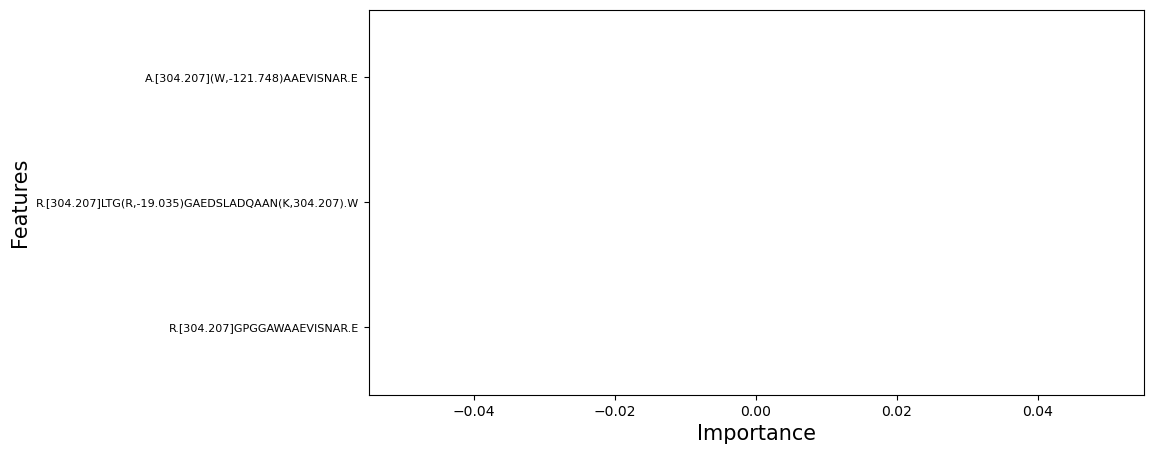

In [240]:
# get feature importance
feature_number = 3
feature_names = ["R.[304.207]GPGGAWAAEVISNAR.E", "R.[304.207]LTG(R,-19.035)GAEDSLADQAAN(K,304.207).W", "A.[304.207](W,-121.748)AAEVISNAR.E", "R.[304.207](L,172.089)TGRGAEDSLADQAAN(K,304.207).W", "R.[304.207](L,285.173)TGRGAEDSLADQAAN(K,304.207).W", "R.[304.207]LTG(R,-19.032)GAEDSLADQAAN(K,304.207)WG.R", "K.[304.207]RGPGGA(W,16.001)AAEVISNAR.E", "D.[226.063]SLADQAAN(K,304.207).W", "R.{59.319}[304.207]GAEDSLADQAAN(K,304.207).W", "L.[304.207]TG(R,-19.036)GAEDSLADQAAN(K,304.207).W", "R.{60.067}[304.207]GAEDSLADQAAN(K,304.207).W", "R.[304.207]LTG(R,37.986)GAEDSLADQAAN(K,304.207).W"]
sorted_idx = np.argsort(xgb_model.feature_importances_)

plt.figure(figsize=(10,5))
plt.barh(np.array(feature_names)[:feature_number],np.array(xgb_model.feature_importances_)[sorted_idx][:feature_number], color='lightpink')
plt.xlabel("Importance", fontdict={'fontsize':15})
plt.ylabel("Features", fontdict={'fontsize':15})
plt.yticks(fontsize = 8,rotation=0)
plt.savefig("./figures/feature_importance.png",dpi=300, bbox_inches = 'tight', pad_inches = 0)
plt.show()